In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import keras
keras.backend.backend()

Using TensorFlow backend.


'tensorflow'

In [ ]:
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

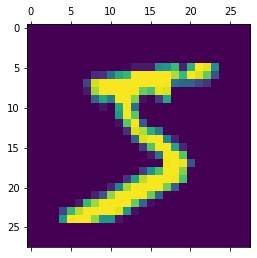

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(80,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=8)

Epoch 1/8
60000/60000 [==============================] - 3s 55us/step - loss: 0.2856 - accuracy: 0.9178
Epoch 2/8
60000/60000 [==============================] - 3s 54us/step - loss: 0.1365 - accuracy: 0.9606
Epoch 3/8
60000/60000 [==============================] - 3s 54us/step - loss: 0.0975 - accuracy: 0.9718
Epoch 4/8
60000/60000 [==============================] - 3s 54us/step - loss: 0.0749 - accuracy: 0.9778
Epoch 5/8
60000/60000 [==============================] - 3s 54us/step - loss: 0.0606 - accuracy: 0.9814
Epoch 6/8
60000/60000 [==============================] - 3s 55us/step - loss: 0.0499 - accuracy: 0.9841
Epoch 7/8
60000/60000 [==============================] - 3s 55us/step - loss: 0.0415 - accuracy: 0.9875
Epoch 8/8
60000/60000 [==============================] - 3s 54us/step - loss: 0.0343 - accuracy: 0.9894


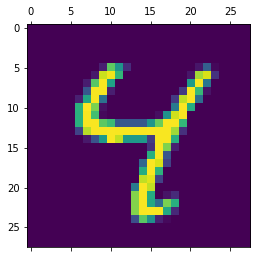

In [ ]:
plt.matshow(x_test[6])

In [ ]:
yp = model.predict(x_test)

In [ ]:
yp[6]

array([1.1083676e-08, 1.8701958e-09, 9.8852899e-09, 2.5576602e-08,
       9.9842811e-01, 7.5227922e-07, 1.5163589e-07, 4.2136591e-05,
       1.1896308e-03, 3.3925107e-04], dtype=float32)

In [ ]:
np.argmax(yp[6])

4

In [ ]:
numOfSample = []
for x in range(0,10):
  print(len(np.where(y_train==x)[0]))
  numOfSample.append(len(np.where(y_train==x)[0]))
print(numOfSample)

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


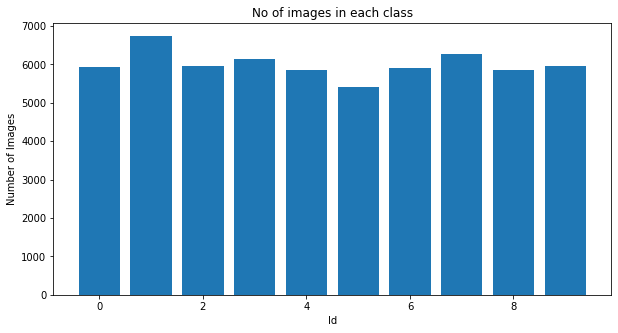

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(0,10),numOfSample)
plt.title("No of images in each class")
plt.xlabel("Id")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

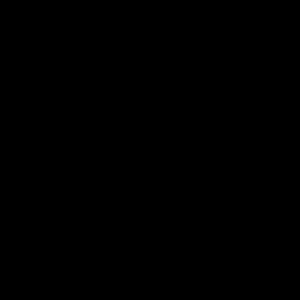

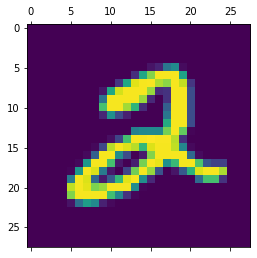

In [ ]:
img = x_train[5]
plt.matshow(img)
img = cv2.resize(img,(300,300))
cv2_imshow(img)